In [4]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set_theme()


# Variance comparison between two varying datasets

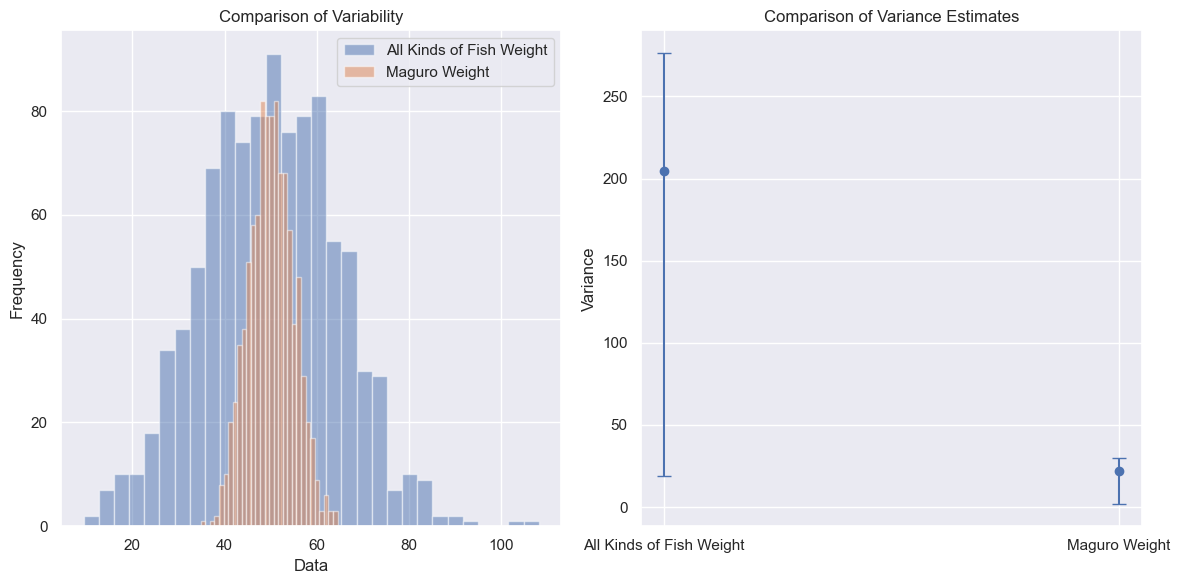

In [5]:
# Step 1: Generate two datasets
# np.random.seed(0)
maguro_weight = np.random.normal(loc=50, scale=5, size=1000)
all_kinds_of_fish_weight = np.random.normal(loc=50, scale=15, size=1000)

# Step 2: Calculate the variance of each dataset
allkinds_variance = np.var(all_kinds_of_fish_weight)
maguro_variance = np.var(maguro_weight)

# Step 3: Find the interval estimate using chi-squared values
alpha = 0.05  # significance level
df = len(all_kinds_of_fish_weight) - 1  # degrees of freedom
chi2_critical_value = chi2.ppf(1 - alpha / 2, df)

high_variability_interval = (
    (df * allkinds_variance) / chi2_critical_value,
    (df * allkinds_variance) / chi2.ppf(alpha / 2, df)
)

low_variability_interval = (
    (df * maguro_variance) / chi2_critical_value,
    (df * maguro_variance) / chi2.ppf(alpha / 2, df)
)

# Step 4: Create subplots for histograms and variance estimates
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Step 5: Plot the histograms of the two datasets
axs[0].hist(all_kinds_of_fish_weight, bins=30, alpha=0.5, label='All Kinds of Fish Weight')
axs[0].hist(maguro_weight, bins=30, alpha=0.5, label='Maguro Weight')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Comparison of Variability')
axs[0].legend()

# Step 6: Take a sample from each dataset
sample_size = 100
all_kinds_sample = np.random.choice(all_kinds_of_fish_weight, size=sample_size)
maguro_sample = np.random.choice(maguro_weight, size=sample_size)

# Step 7: Estimate variance intervals at 95% confidence using chi-squared critical values
all_kinds_sample_variance = np.var(all_kinds_sample)
maguro_sample_variance = np.var(maguro_sample)

all_kinds_sample_interval = (
    (sample_size - 1) * all_kinds_sample_variance / chi2_critical_value,
    (sample_size - 1) * all_kinds_sample_variance / chi2.ppf(alpha / 2, sample_size - 1)
)

maguro_sample_interval = (
    (sample_size - 1) * maguro_sample_variance / chi2_critical_value,
    (sample_size - 1) * maguro_sample_variance / chi2.ppf(alpha / 2, sample_size - 1)
)

# Step 8: Plot the estimates and intervals
axs[1].errorbar([0, 1], [all_kinds_sample_variance, maguro_sample_variance],
             yerr=[[abs(all_kinds_sample_interval[0] - all_kinds_sample_variance),
                    abs(maguro_sample_interval[0] - maguro_sample_variance)],
                   [abs(all_kinds_sample_variance - all_kinds_sample_interval[1]),
                    abs(maguro_sample_variance - maguro_sample_interval[1])]],
             fmt='o', capsize=5)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['All Kinds of Fish Weight', 'Maguro Weight'])
axs[1].set_ylabel('Variance')
axs[1].set_title('Comparison of Variance Estimates')

# Step 9: Display the subplots
plt.tight_layout()
plt.show()


Take 

In [6]:
def plot_sample_means(sample_size=4, num_samples=1000):
    sample_means = []

    for _ in range(num_samples):
        sample = np.random.choice(maguro_weight, size=sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Create the plot
    plt.figure(figsize=(16, 6))  # Set the plot width to 100%
    sns.histplot(sample_means, bins=50, kde=True)  # Add kde=True to draw the KDE line
    plt.xlabel('Mean')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of Sample Means', fontsize=25,pad=20)
    plt.tight_layout()
    plt.show()


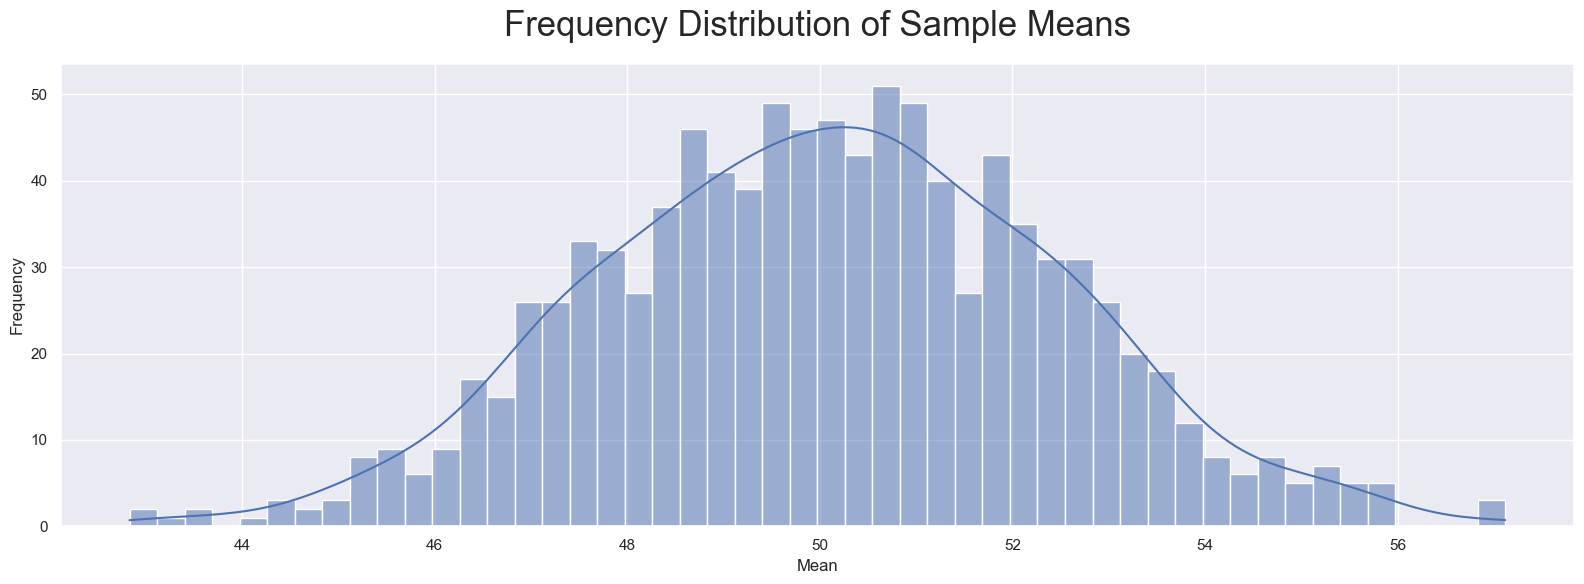

In [11]:
plot_sample_means(4, 1000)

In [22]:
def plot_sample_variances(sample_size=4, num_samples=1000):
    sample_variances = []

    for _ in range(num_samples):
        sample = np.random.choice(maguro_weight, size=sample_size)
        sample_variance = np.var(sample)
        sample_variances.append(sample_variance)

    # Create the plot
    plt.figure(figsize=(16, 6))  # Set the plot width to 100%
    sns.histplot(sample_variances, bins=50, kde=True)  # Add kde=True to draw the KDE line
    plt.xlabel('Variance')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of Sample Variances', fontsize=25,pad=20)
    plt.tight_layout()
    plt.show()


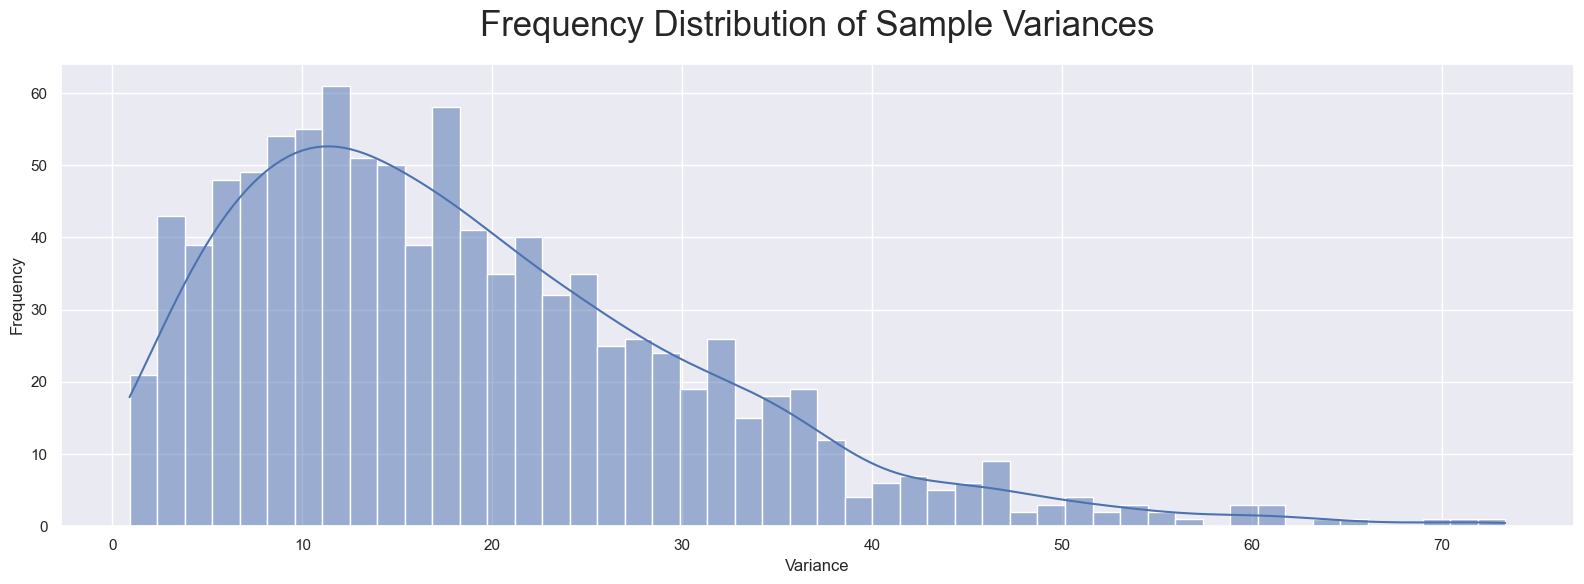

In [26]:
plot_sample_variances(5, 1000)

Here is what the chi-squared distribution looks like with varying degrees of freedom

In [27]:

# Set the degrees of freedom
degrees_of_freedom = [1, 2, 3, 4, 5, 6,7,8,9,10,20]

# Set the x-axis range
x = np.linspace(0, 50, 100)

# Create a figure
fig = go.Figure()

# Plot the chi-squared distributions
for i, df in enumerate(degrees_of_freedom):
    y = chi2.pdf(x, df)
    color = f"rgb(0, 0, {i * (255 // len(degrees_of_freedom))})"
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f"df={df}", line=dict(color=color)))

# Set the plot title and labels
fig.update_layout(title="Chi-Squared Distribution", xaxis_title="Value", yaxis_title="Density")

# Update the height of the figure layout
fig.update_layout(height=600)

# Show the plot
fig.show()


Now we creeate a function that generates a plot that shows the lower and upper values of a given confidence interval for a chi-squared distribution.

In [33]:
import seaborn as sns

def plot_chi_squared(df, confidence_interval):
    # Calculate the chi-squared distribution
    y = chi2.pdf(x, df)

    # Create the plot
    sns.lineplot(x=x, y=y, label=f"df={df}")
    plt.axvline(chi2.ppf(confidence_interval[0], df), color='red', linestyle='--', label=f'Lower Limit: {chi2.ppf(confidence_interval[0], df):.4f}')
    plt.axvline(chi2.ppf(confidence_interval[1], df), color='green', linestyle='--', label=f'Upper Limit: {chi2.ppf(confidence_interval[1], df):.4f}')

    # Color the area under the curve
    x_fill = np.linspace(chi2.ppf(confidence_interval[0], df), chi2.ppf(confidence_interval[1], df), 100)
    y_fill = chi2.pdf(x_fill, df)
    plt.fill_between(x_fill, y_fill, alpha=0.3, color='blue', label='Area under the curve')

    # Set the plot title and labels
    plt.title("Chi-Squared Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")

    # Set the x-axis limits to start from 0
    plt.ylim(0)
    plt.xlim(0)

    # Move the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()


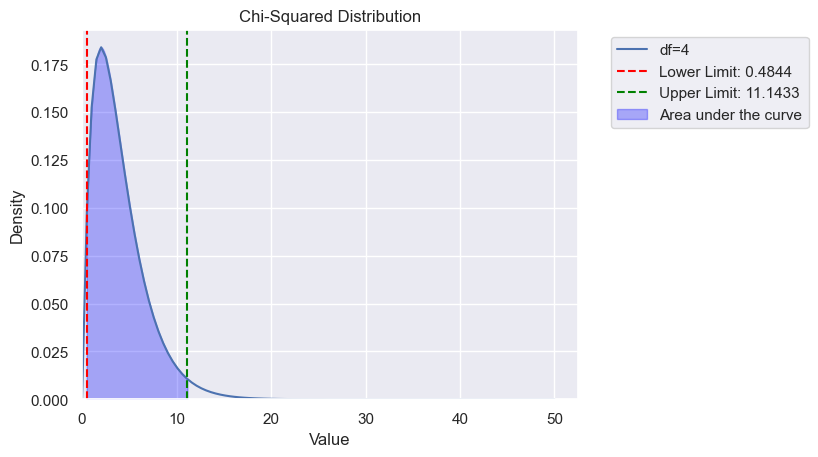

In [40]:
# Example usage
degrees_of_freedom = 4
confidence_interval = (0.025, 0.975)
plot_chi_squared(degrees_of_freedom, confidence_interval)


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the data from the CSV file
df = pd.read_csv('GOOG.csv')

# Create a scatter plot with lines
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['GOOG'], mode='markers+lines', name='GOOG'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['NFLX'], mode='markers+lines', name='NFLX'))

# Set the x-axis label
fig.update_layout(xaxis_title='Date')

# Set the y-axis label
fig.update_layout(yaxis_title='Value')

# Set the title
fig.update_layout(title='Stock Prices')

# Show the plot
fig.show()


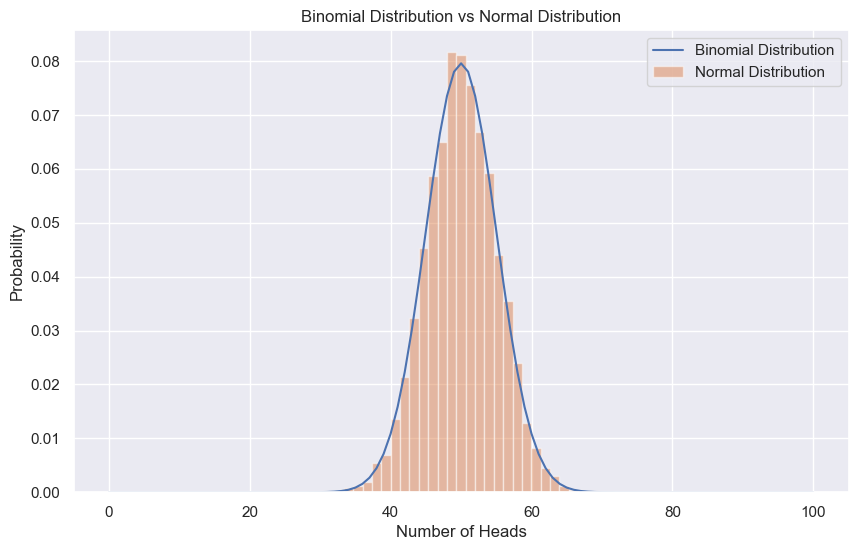

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set the number of coin flips
num_flips = 100

# Set the probability of heads (success)
p = 0.5

# Generate the binomial distribution
x = np.arange(0, num_flips + 1)
y = binom.pmf(x, num_flips, p)

# Calculate the mean and standard deviation of the binomial distribution
mean = num_flips * p
std = np.sqrt(num_flips * p * (1 - p))

# Create a normal distribution with the same mean and standard deviation
normal_dist = np.random.normal(mean, std, size=10000)

# Plot the binomial distribution and the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Binomial Distribution')
plt.hist(normal_dist, bins=30, density=True, alpha=0.5, label='Normal Distribution')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution vs Normal Distribution')
plt.legend()
plt.show()
